The purpose of this notebook is to run a simple factor analysis.

Author: Roza G. Bayrak

In [285]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
import scipy.io as sio
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [4]:
path = '/data/bayrakrg/power+xifra/physio_patterns'
beh = path + '/behavioral_data_375_subjects_unadj.txt'
table = pd.read_csv(beh, delimiter=',')
table

,Subject,MMSE_Score,PSQI_Score,PicSeq_Unadj,CardSort_Unadj,Flanker_Unadj,PMAT24_A_CR,ReadEng_Unadj,PicVocab_Unadj,ProcSpeed_Unadj,...,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,Odor_Unadj,PainInterf_Tscore,Taste_Unadj,Mars_Log_Score,Mars_Final
0,100206,30,6,125.07,119.14,130.42,20.0,113.5460,119.8914,138.72,...,29,23,26,21,32,108.79,49.7,72.63,1.84,1.84
1,100307,29,4,110.61,123.75,112.56,17.0,111.0700,107.2000,122.65,...,37,24,35,15,37,101.12,38.6,71.69,1.76,1.76
2,101309,29,5,102.89,99.76,113.67,15.0,106.9173,123.3551,105.28,...,36,22,36,2,26,122.25,38.6,106.39,1.80,1.80
3,101915,29,6,95.13,102.25,98.94,21.0,120.9500,121.6300,103.25,...,35,30,45,8,31,96.87,38.6,112.11,1.84,1.80
4,102008,30,3,113.72,119.59,115.50,20.0,128.1398,124.8017,137.25,...,25,27,27,7,36,122.25,50.1,67.48,1.80,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,978578,30,4,135.55,94.90,112.13,20.0,119.1700,121.0100,103.68,...,31,35,28,27,19,122.25,38.6,80.52,1.72,1.68
371,979984,30,8,115.73,101.21,103.78,14.0,108.0226,119.5700,87.60,...,31,37,36,18,28,122.25,54.3,86.03,1.76,1.76
372,983773,30,5,108.04,122.83,124.40,24.0,123.5200,137.5200,116.07,...,34,36,31,30,30,108.79,52.6,92.84,1.80,1.80
373,987983,30,3,105.63,115.28,119.16,22.0,130.7500,120.0100,107.88,...,32,41,32,13,34,108.79,56.4,88.02,1.88,1.88


In [5]:
family = path + '/restricted_part_ver2.xlsx'
df = pd.read_excel(family, sheet_name=None)
df

OrderedDict([('Sheet1',
                    Subject ZygositySR ZygosityGT  Mother_ID  Father_ID    Family_ID
              0      100004    NotTwin                 52259      82122  52259_82122
              1      100206    NotTwin                 56037      85858  56037_85858
              2      100307      NotMZ         MZ      51488      81352  51488_81352
              3      100408         MZ         MZ      51730      81594  51730_81594
              4      100610      NotMZ         DZ      52813      82634  52813_82634
              ...       ...        ...        ...        ...        ...          ...
              1201   992774    NotTwin                 51345      81210  51345_81210
              1202   993675    NotTwin                 55800      85621  55800_85621
              1203   994273    NotTwin                 52364      82227  52364_82227
              1204   995174         MZ         MZ      55923      85743  55923_85743
              1205   996782      NotMZ   

### Initial Analyses


In [21]:
# correlation
# path to percent variance explained maps
path_to_files = path + '/percent_variance_map_RVHR'
files = os.listdir(path_to_files)

# initialise data of lists.
tag, day, phase = [], [], []
for i, filename in enumerate(files):
    parts = filename.split('_')
    tag.append(parts[0])
    day.append(parts[2])
    phase.append(parts[3])

# Create a dict
data = {'tag': tag, 'day': day, 'phase': phase}

# Create DataFrame
df = pd.DataFrame(data)

# compare within day
# REST1 LR to RL, REST2 LR to RL

# plot



# compare across days
# Average within day scans and compare REST1 to REST2

# plot



In [ ]:
# permutation test

In [279]:
# prep for PCA
# load brain mask
bm = '/data/MNI152/MNI152_T1_2mm_brain_mask_filled.nii.gz'
bm_inds = np.where(bm==1);

# path to percent variance explained maps
files = path + '/percent_variance_map_RVHR/'

# find unique subject ids
ids = sorted(df.tag.unique())

scans = ['REST1_LR', 'REST1_RL', 'REST2_LR', 'REST2_RL']

all_subjects = []

for tag in ids:
    mats, mean_mats = [], []
    for scan in scans:
#         if tag == '100206':
        filename = files + tag + '_rfMRI_' + scan + '_RVHR.mat'
        mat = sio.loadmat(filename)
        mats.append(mat['pctvar_vec_RVHR'])
    mean_mats = np.mean(np.nan_to_num(mats[0]), axis=0)
    all_subjects.append(mean_mats)

all_subject = np.array(all_subjects)

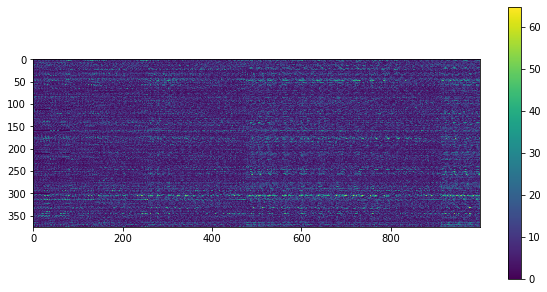

In [308]:
# Look at the data
plt.figure(figsize=(10,5))
plt.imshow(all_subject[:375, :1000])
plt.colorbar()
plt.show()

# Why does this look so odd?

In [306]:
# run PCA    
pca = PCA(n_components=0.99, svd_solver='full')
ve_pca = pca.fit_transform(all_subjects)

print('Original data shape:', all_subject.shape)
print('PCA data shape:', ve_pca.shape)
print('PCA explained by variance ratio:', pca.explained_variance_ratio_[:3])

Original data shape: (375, 229694)
PCA data shape: (375, 352)
PCA explained by variance ratio: [0.29580463 0.02744465 0.01486522]


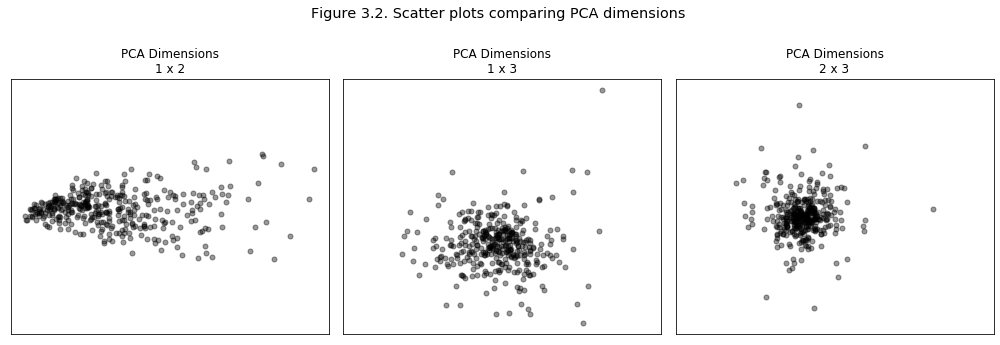

In [303]:
"""
Plot the low dim representation of the bold data
"""
# Setting plotting parameters
alpha_val = .4

# Plot
n_plots = 3 
f, axes = plt.subplots(1, n_plots, figsize=(14,5))
st=f.suptitle("Figure 3.2. Scatter plots comparing PCA dimensions ", fontsize="x-large")

# plot data
axes[0].scatter(ve_pca[:, 0], ve_pca[:, 1], 
                alpha=alpha_val, marker='.', s=100, color = 'k')
axes[1].scatter(ve_pca[:, 1], ve_pca[:, 2], 
                alpha=alpha_val, marker='.', s=100, color = 'k')
axes[2].scatter(ve_pca[:, 2], ve_pca[:, 3], 
                alpha=alpha_val, marker='.', s=100, color = 'k')

axes[0].set_title('PCA Dimensions\n1 x 2')
axes[1].set_title('PCA Dimensions\n1 x 3')
axes[2].set_title('PCA Dimensions\n2 x 3')

# modifications that are common to all plots 
for i in range(n_plots): 
    axes[i].axis('equal')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

f.tight_layout()
st.set_y(0.95)
f.subplots_adjust(top=0.75)

In [8]:
# CCA

In [9]:
# Factor Analysis